Plots generated in the paper were made using the seaborn python package (http://stanford.edu/~mwaskom/software/seaborn/). For compatiblity, we only use matplotlib here (the only differences are aesthetic). There is an option to enable seaborn if installed by uncommenting. 

To generate own data, run the individual run_simulations_figX.py python script from the terminal first (see README). This will take a lot of time, and run many processes! It also requires brian to be installed (http://briansimulator.org/) . 

In [28]:
## imports and utility plotting functions

import pickle 
import glob as glob_fun
import scipy
import cookb_signalsmooth
import matplotlib
from numpy import multiply, mean
from pylab import axes, setp
import pylab

#seaborn.set('poster','nogrid','deep','serif')

matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['figure.facecolor'] = 'white'



font_params = {"axes.labelsize": 30,

                       "axes.titlesize": 30,
                       "xtick.labelsize": 30,
                       "ytick.labelsize": 30,
                       "legend.fontsize": 40,
}

sea_colors = ['b','g','r']

#seaborn.color_palette()

matplotlib.rcParams.update(font_params)


def load_file(filename):
    file_read = open(filename,'r+b')
    pickle_file = pickle.load(file_read)
    return pickle_file

# by default diplasy plots inline, below the cell. Comment out to display plots in separate window
%matplotlib inline 

# Figure 1

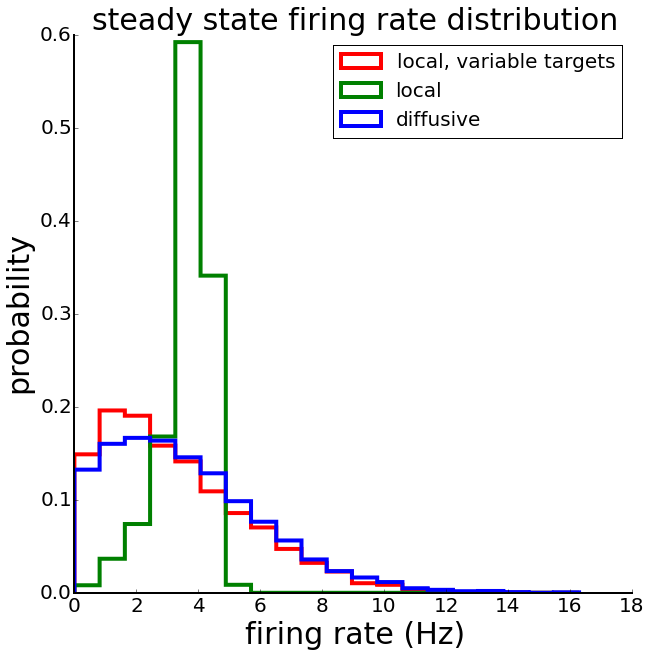

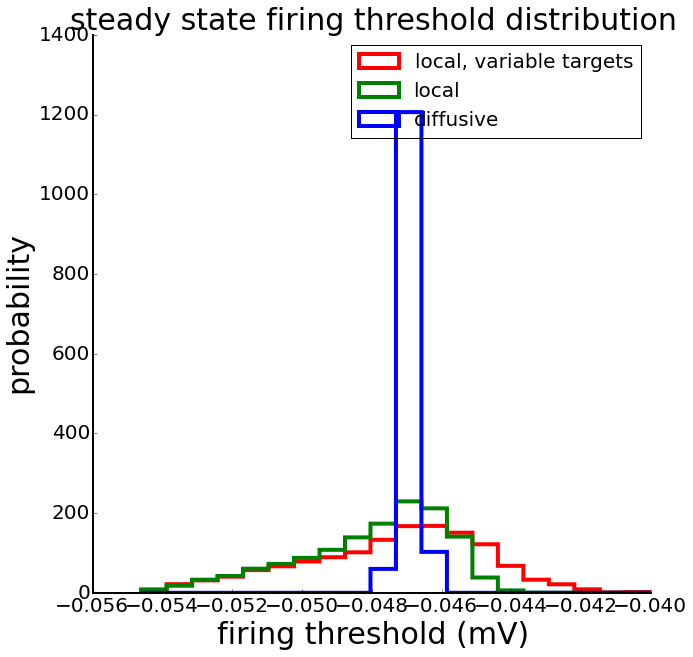

In [29]:
def plot_hist(dists,labels,nbin=20):
    pylab.figure(figsize=(10,10))
    fig = pylab.axes()
    pylab.hist(dists, nbin,histtype='step',lw=4,label=labels,normed=True)
   
    fig.spines['right'].set_visible(False)
    fig.spines['top'].set_visible(False)
    pylab.legend(fontsize=20)
    fig.tick_params(top=False)
    fig.tick_params(right=False)
    fig.tick_params(labelsize=20)
    
    
diffuse_dists = load_file('../simulation-results/fig-1/results_diffusive.pickle')
local_dists = load_file('../simulation-results/fig-1/results_non_diffusive.pickle')
local_vars_dists = load_file('../simulation-results/fig-1/results_non_diffusive_variable_targets.pickle')
        
plot_hist([diffuse_dists['rates_hist'],local_dists['rates_hist'],local_vars_dists['rates_hist']],['diffusive','local','local, variable targets'],20)
pylab.title('steady state firing rate distribution')
pylab.xlabel('firing rate (Hz)')
pylab.ylabel('probability')
pylab.show()

plot_hist([diffuse_dists['Vt_hist'],local_dists['Vt_hist'],local_vars_dists['Vt_hist']],['diffusive','local','local, variable targets'],20)
pylab.title('steady state firing threshold distribution')
pylab.xlabel('firing threshold (mV)')
pylab.ylabel('probability')
pylab.show()


# Figure 4

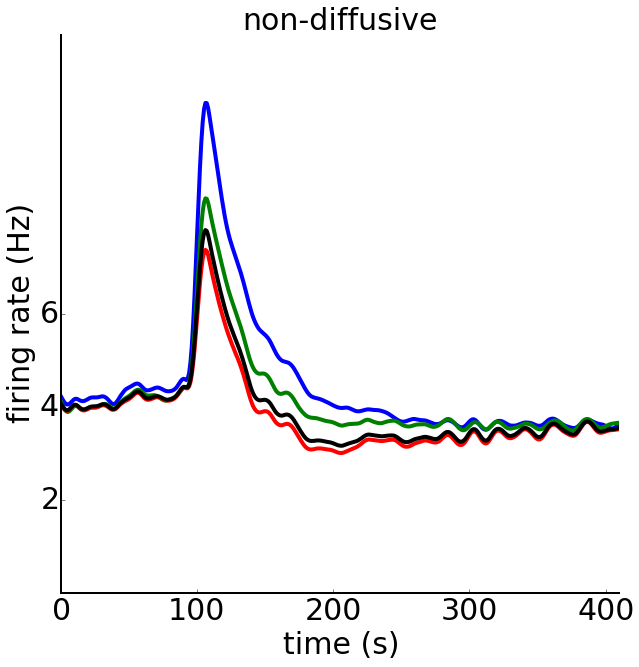

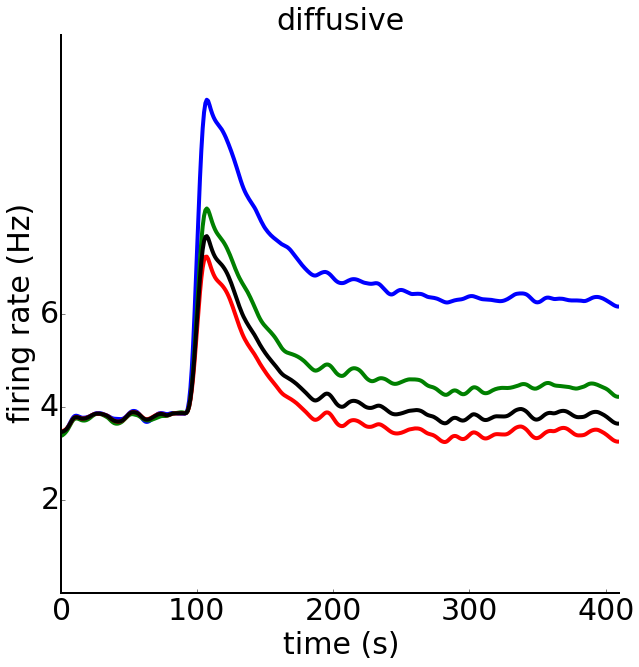

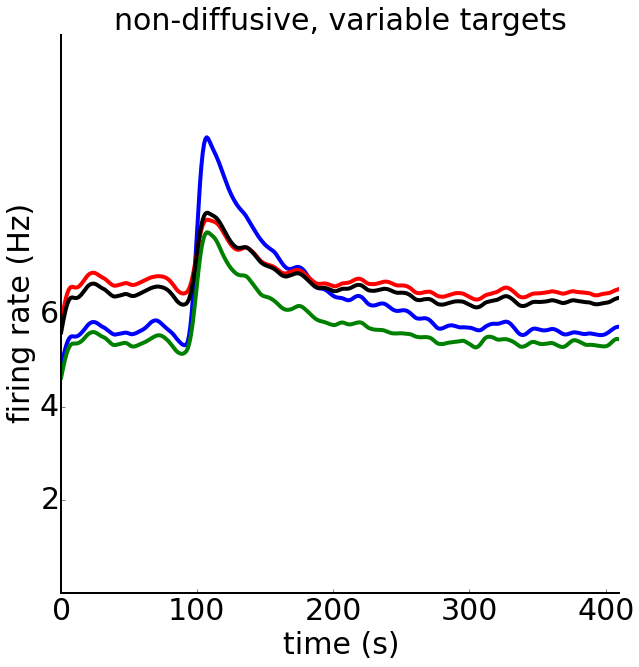

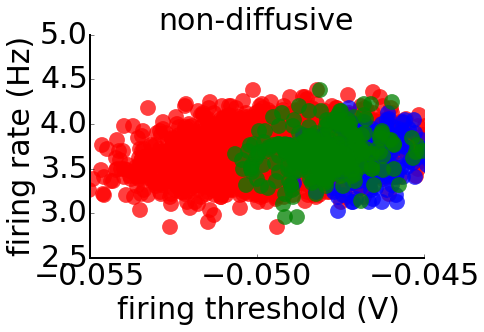

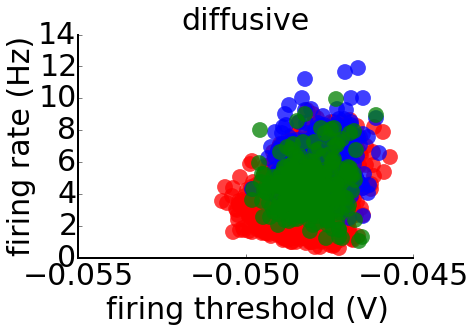

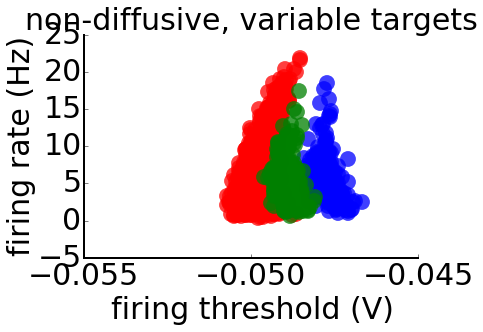

In [22]:
def plot_input_group_rates(diffuse_dist, label):
    smooth_width = 20
    pylab.figure(figsize=(10,10))
    fig = pylab.axes()
    pylab.hold(True)
    pylab.plot(multiply(range(len(diffuse_dist['ratesA_std'])),1.0),cookb_signalsmooth.smooth(scipy.array(diffuse_dist['ratesA_mean']),smooth_width),color=sea_colors[0],lw=4,label='10 Hz')
    pylab.plot(multiply(range(len(diffuse_dist['ratesB_std'])),1.0),cookb_signalsmooth.smooth(scipy.array(diffuse_dist['ratesB_mean']),smooth_width),color=sea_colors[1],lw=4,label='5 Hz')
    pylab.plot(multiply(range(len(diffuse_dist['rates_std'])),1.0),cookb_signalsmooth.smooth(scipy.array(diffuse_dist['rates_mean']),smooth_width),color=sea_colors[2],lw=4,label= '2 Hz')
    mean_rate_diffuse = pylab.add(pylab.add(multiply(diffuse_dist['rates_mean'],0.8),multiply(diffuse_dist['ratesA_mean'],0.1)),multiply(diffuse_dist['ratesB_mean'],0.1))
    pylab.plot(multiply(range(len(diffuse_dist['rates_std'])),1.0),cookb_signalsmooth.smooth(scipy.array(mean_rate_diffuse),smooth_width),color='black',lw=4,label='population mean')
    fig.spines['right'].set_visible(False)
    fig.spines['top'].set_visible(False)
    fig.tick_params(top=False)
    fig.tick_params(right=False)
    pylab.xlim(0,410)
    pylab.ylim(0,12)
    fig.set_xticks([0,100,200,300,400])
    fig.set_yticks([2,4,6])


diffuse_dists = load_file('../simulation-results/fig-4/results_diffusing-True_trial_ID-0.pickle')
local_dists = load_file('../simulation-results/fig-4/results_diffusing-False_trial_ID-0.pickle')
local_vars_dists = load_file('../simulation-results/fig-4/results_diffusing-False_var_targets_premod_mean-2.0_var_targets_premod_std-5.0_variable_targets-True_trial_ID-0.pickle')


plot_input_group_rates(local_dists,'non-diffusive')
pylab.ylabel('firing rate (Hz)',size=30)
pylab.xlabel('time (s)',size=30)
pylab.title('non-diffusive', size=30)
pylab.show()

plot_input_group_rates(diffuse_dists, 'diffusive')
pylab.ylabel('firing rate (Hz)',size=30)
pylab.xlabel('time (s)',size=30)
pylab.title('diffusive', size=30)
pylab.show()

plot_input_group_rates(local_vars_dists,'non-diffusive, variable targets')
pylab.ylabel('firing rate (Hz)',size=30)
pylab.xlabel('time (s)',size=30)
pylab.title('non-diffusive, variable targets', size=30)
pylab.show()


fig = pylab.axes()
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(top=False)
fig.tick_params(right=False)
fig.set_xticks([-0.055,-0.05,-0.045])
fig.set_xlim((-.055,-.045))
    
pylab.scatter(local_dists['Vt_hist'][500:],local_dists['rates_hist'][500:],c=sea_colors[2],s=250,alpha=0.75,lw=0)
pylab.scatter(local_dists['Vt_hist'][:250],local_dists['rates_hist'][:250],c=sea_colors[0],s=250,alpha=0.75,lw=0)
pylab.scatter(local_dists['Vt_hist'][250:500],local_dists['rates_hist'][250:500],c=sea_colors[1],s=250,alpha=0.75,lw=0)
pylab.ylabel('firing rate (Hz)',size=30)
pylab.xlabel('firing threshold (V)',size=30)
pylab.title('non-diffusive', size=30)
pylab.show()

fig = pylab.axes()
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(top=False)
fig.tick_params(right=False)
fig.set_xticks([-0.055,-0.05,-0.045])
fig.set_xlim((-.055,-.045))
    
pylab.scatter(diffuse_dists['Vt_hist'][500:],diffuse_dists['rates_hist'][500:],c=sea_colors[2],s=250,alpha=0.75,lw=0)
pylab.scatter(diffuse_dists['Vt_hist'][:250],diffuse_dists['rates_hist'][:250],c=sea_colors[0],s=250,alpha=0.75,lw=0)
pylab.scatter(diffuse_dists['Vt_hist'][250:500],diffuse_dists['rates_hist'][250:500],c=sea_colors[1],s=250,alpha=0.75,lw=0)
pylab.ylabel('firing rate (Hz)',size=30)
pylab.xlabel('firing threshold (V)',size=30)
pylab.title('diffusive', size=30)
pylab.show()

fig = pylab.axes()
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.tick_params(top=False)
fig.tick_params(right=False)
fig.set_xticks([-0.055,-0.05,-0.045])
fig.set_xlim((-.055,-.045))

pylab.scatter(local_vars_dists['Vt_hist'][500:],local_vars_dists['rates_hist'][500:],c=sea_colors[2],s=250,alpha=0.75,lw=0)
pylab.scatter(local_vars_dists['Vt_hist'][:250],local_vars_dists['rates_hist'][:250],c=sea_colors[0],s=250,alpha=0.75,lw=0)
pylab.scatter(local_vars_dists['Vt_hist'][250:500],local_vars_dists['rates_hist'][250:500],c=sea_colors[1],s=250,alpha=0.75,lw=0)
pylab.ylabel('firing rate (Hz)',size=30)
pylab.xlabel('firing threshold (V)',size=30)
pylab.title('non-diffusive, variable targets', size=30)
pylab.show()

# Figure 5

diffusion r_squared =  0.834881812391
local r_squ =  0.641662737019
local, variable targets r_squared =  0.59275807303


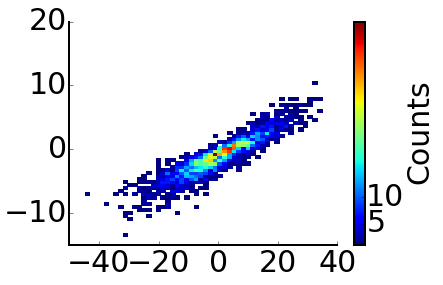

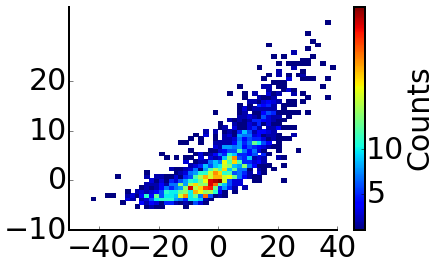

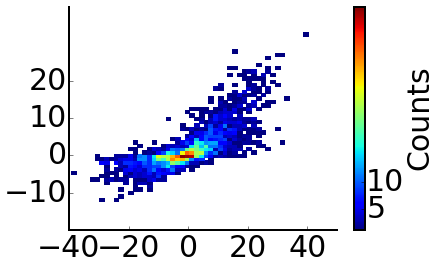

In [23]:
from scipy import stats

diffuse_dists = load_file('../simulation-results/fig-5/results_diffusing-True_ds-0.002_trial_ID-0.pickle')
local_dists = load_file('../simulation-results/fig-5/results_diffusing-False_trial_ID-0.pickle')
local_vars_dists = load_file('../simulation-results/fig-5/results_diffusing-False_var_targets_premod_mean-2.0_var_targets_premod_std-5.0_variable_targets-True_trial_ID-0.pickle')

def plot_2Dhist(x,y,nbins,label_passed):
    #seaborn.reset_defaults()
    pylab.rcParams["image.cmap"] = 'jet' 
    H, xedges, yedges = pylab.histogram2d(x,y,bins=nbins) 
    # H needs to be rotated and flipped
    H = pylab.rot90(H)
    H = pylab.flipud(H)
    # Mask zeros
    Hmasked = pylab.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    # Plot 2D histogram using pcolor
    pylab.figure()
    pylab.pcolormesh(xedges,yedges,Hmasked,label=label_passed)
    fig1 = pylab.axes()
    #pylab.title(label_passed)
    #pylab.xlabel(r'$\Delta \nu_{input}$ (Hz)')
    #pylab.ylabel(r'$\Delta \nu_{output}$ (Hz)')
    fig1.legend()
    #pylab.ylim(-35,15)
    cbar = pylab.colorbar()
    cbar.ax.set_ylabel('Counts')  
    cbar.set_ticks([5,10])
    fig1.spines['right'].set_visible(False)
    fig1.spines['top'].set_visible(False)
    fig1.tick_params(top=False)
    fig1.tick_params(right=False)
    fig1.set_xticks([-40,-20,0,20,40])
    fig1.set_yticks([-10,0,10,20])

rates_diff = diffuse_dists['rates_reconf']-diffuse_dists['rates_hist']
plot_2Dhist(-1*diffuse_dists['inputs_diff'],rates_diff,50,'diffusive')
print 'diffusion r_squared = ', stats.linregress(-1*diffuse_dists['inputs_diff'],rates_diff)[2]**2

rates_diff = local_dists['rates_reconf']-local_dists['rates_hist']
plot_2Dhist(-1*local_dists['inputs_diff'],rates_diff,50,'diffusive')
print 'local r_squ = ', stats.linregress(-1*local_dists['inputs_diff'],rates_diff)[2]**2

rates_diff = local_vars_dists['rates_reconf']-local_vars_dists['rates_hist']
plot_2Dhist(-1*local_vars_dists['inputs_diff'],rates_diff,50,'diffusive')
print 'local, variable targets r_squared = ', stats.linregress(-1*local_vars_dists['inputs_diff'],rates_diff)[2]**2
